# What's the cause of cancellations in our spectra?

## Load data

In [1]:
using Damysos
using PyPlot
using DSP
using FFTW
PyPlot.svg(true)

true

In [2]:
function applyhanning(x::Vector) 
    if iseven(length(x))
        pushfirst!(x,x[1])
    end
    return x .* hanning(length(x))
end

applyhanning (generic function with 1 method)

In [3]:
path = "/home/how09898/phd/data/hhgjl/tqt-compare/Ensemble[8](2d)GappedDirac_GaussianEPulse_t2_sweep_2024-02-19_Whimsy/ensemble.meta"
# path = "/home/how09898/phd/data/hhgjl/tqt-compare/Ensemble[10](2d)GappedDirac_GaussianEPulse_t2_sweep_2024-02-05_Skedoodle/ensemble.meta"
path = "/home/how09898/phd/data/hhgjl/tqt-compare/Ensemble[10](2d)GappedDirac_GaussianEPulse_t2_sweep_2024-02-16_Ziggurat/ensemble.meta"
ens  = load(path)

Ensemble{Float64} of 10 Simulations{Float64}:
 id: t2_sweep_2024-02-16_Ziggurat
 datapath: /home/how09898/phd/data/hhgjl/tqt-compare/Ensemble[10](2d)GappedDirac_GaussianEPulse_t2_sweep_2024-02-16_Ziggurat/
 plotpath: /home/how09898/phd/plots/hhgjl/tqt-compare/Ensemble[10](2d)GappedDirac_GaussianEPulse_t2_sweep_2024-02-16_Ziggurat/


In [4]:
path = "/home/how09898/phd/data/hhgjl/tqt-compare/Ensemble[10](2d)GappedDirac_GaussianEPulse_t2_sweep_2024-02-16_Ziggurat/t2=Inf/simulation.meta"
sim  = load(path)
ppath = "/home/how09898/phd/plots/hhgjl/tqt-compare/Ensemble[10](2d)GappedDirac_GaussianEPulse_t2_sweep_2024-02-16_Ziggurat/t2=Inf/"
dpath = "/home/how09898/phd/data/hhgjl/tqt-compare/Ensemble[10](2d)GappedDirac_GaussianEPulse_t2_sweep_2024-02-16_Ziggurat/t2=Inf/"
sim = Simulation(sim.hamiltonian,sim.drivingfield,sim.numericalparams,sim.observables,sim.unitscaling,sim.dimensions,sim.id,dpath,ppath)
pushfirst!(ens.simlist,sim);
ens

Ensemble{Float64} of 11 Simulations{Float64}:
 id: t2_sweep_2024-02-16_Ziggurat
 datapath: /home/how09898/phd/data/hhgjl/tqt-compare/Ensemble[10](2d)GappedDirac_GaussianEPulse_t2_sweep_2024-02-16_Ziggurat/
 plotpath: /home/how09898/phd/plots/hhgjl/tqt-compare/Ensemble[10](2d)GappedDirac_GaussianEPulse_t2_sweep_2024-02-16_Ziggurat/


In [5]:
vtot = [s.observables[1].vx for s in ens.simlist];
vra  = [s.observables[1].vxintra for s in ens.simlist];
ver  = [s.observables[1].vxinter for s in ens.simlist];

In [6]:
fs  = 1 / getparams(ens[1]).dt
fre = periodogram(vtot[1],fs=fs).freq;

In [7]:
ftvtot = [rfft(applyhanning(v)) for v in vtot];
ftvra  = [rfft(applyhanning(v)) for v in vra];
ftver  = [rfft(applyhanning(v)) for v in ver];

## Spectra evolving with dephasing

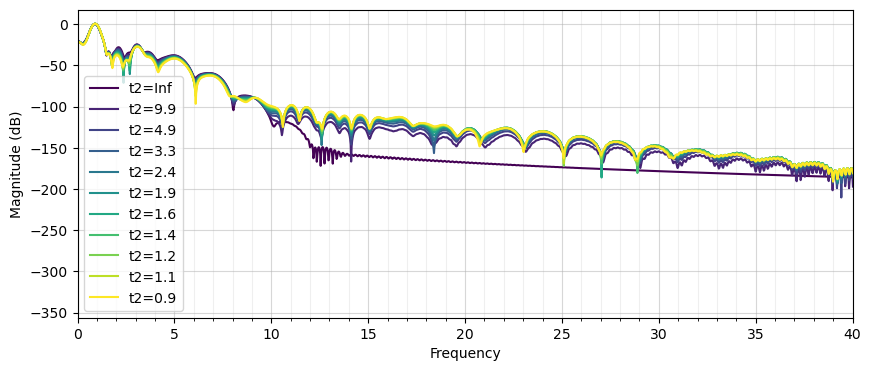

PyObject <matplotlib.legend.Legend object at 0x7fd363c0f730>

In [11]:
fig = plt.figure(figsize=(10,4))
cm = ColorMap("viridis")
ax = fig.add_subplot(1, 1, 1)
cs = cm.(LinRange(0,1,length(vtot)))
for (v,c,sim) in zip(vtot,cs,ens.simlist)
    ax.magnitude_spectrum(v,Fs=fs,scale="dB",color=c,label=sim.id[1:6],pad_to=4length(v))
end
ax.set_xticks(0:100,minor=true)
ax.grid(which="minor", alpha=0.2)
ax.grid(which="major", alpha=0.5)
ax.set_xlim((0,40))
ax.legend()

## Unwrapped phase spectrum

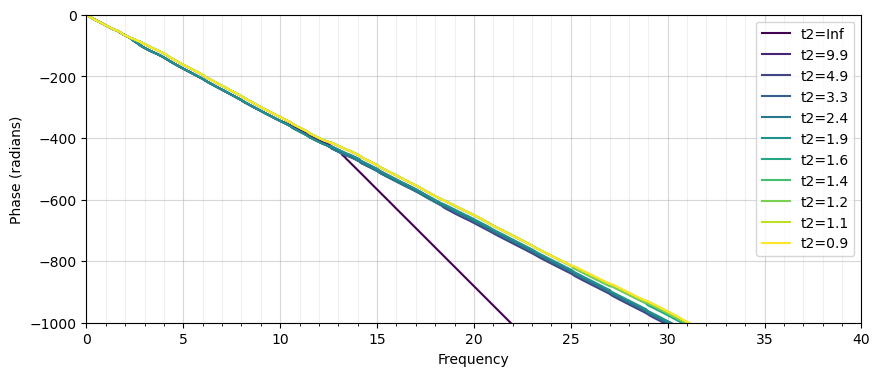

PyObject <matplotlib.legend.Legend object at 0x7fd362dfa8e0>

In [19]:
fig = plt.figure(figsize=(10,4))
cm = ColorMap("viridis")
ax = fig.add_subplot(1, 1, 1)
cs = cm.(LinRange(0,1,length(vtot)))
for (v,c,sim) in zip(vtot,cs,ens.simlist)
    ax.phase_spectrum(v,Fs=fs,color=c,label=sim.id[1:6],pad_to=8length(v))
end
ax.set_xticks(0:100,minor=true)
ax.grid(which="minor", alpha=0.2)
ax.grid(which="major", alpha=0.5)
ax.set_xlim((0,40))
ax.set_ylim((-1_000,0))
ax.legend()

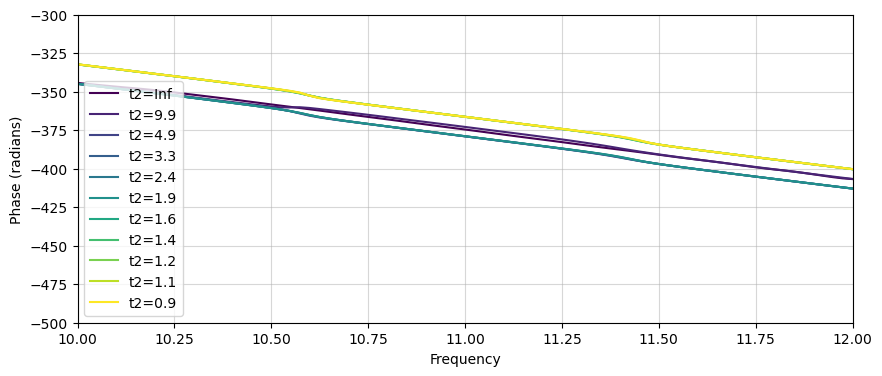

PyObject <matplotlib.legend.Legend object at 0x7fd3628e9640>

In [22]:
fig = plt.figure(figsize=(10,4))
cm = ColorMap("viridis")
ax = fig.add_subplot(1, 1, 1)
cs = cm.(LinRange(0,1,length(vtot)))
for (v,c,sim) in zip(vtot,cs,ens.simlist)
    ax.phase_spectrum(v,Fs=fs,color=c,label=sim.id[1:6],pad_to=4length(v))
end
ax.set_xticks(0:100,minor=true)
ax.grid(which="minor", alpha=0.2)
ax.grid(which="major", alpha=0.5)
ax.set_xlim((10,12))
ax.set_ylim((-500,-300))
ax.legend()

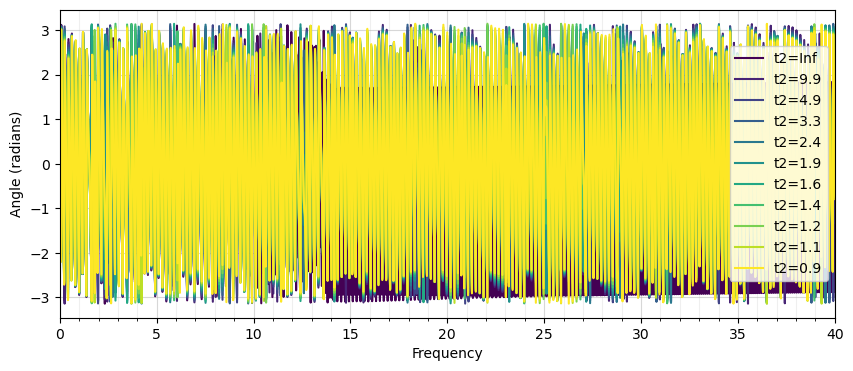

PyObject <matplotlib.legend.Legend object at 0x7fd3626baf40>

In [23]:
fig = plt.figure(figsize=(10,4))
cm = ColorMap("viridis")
ax = fig.add_subplot(1, 1, 1)
cs = cm.(LinRange(0,1,length(vtot)))
for (v,c,sim) in zip(vtot,cs,ens.simlist)
    ax.angle_spectrum(v,Fs=fs,color=c,label=sim.id[1:6],pad_to=4length(v))
end
ax.set_xticks(0:100,minor=true)
ax.grid(which="minor", alpha=0.2)
ax.grid(which="major", alpha=0.5)
ax.set_xlim((0,40))
ax.legend(loc="right")

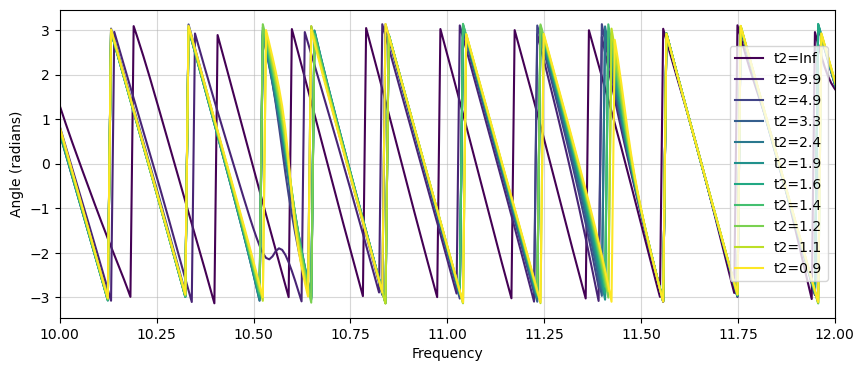

PyObject <matplotlib.legend.Legend object at 0x7fd36107ac40>

In [31]:
fig = plt.figure(figsize=(10,4))
cm = ColorMap("viridis")
ax = fig.add_subplot(1, 1, 1)
cs = cm.(LinRange(0,1,length(vtot)))
for (v,c,sim) in zip(vtot,cs,ens.simlist)
    ax.angle_spectrum(v,Fs=fs,color=c,label=sim.id[1:6],pad_to=12length(v))
end
ax.set_xticks(0:100,minor=true)
ax.grid(which="minor", alpha=0.2)
ax.grid(which="major", alpha=0.5)
ax.set_xlim((10,12))
ax.legend(loc="right")

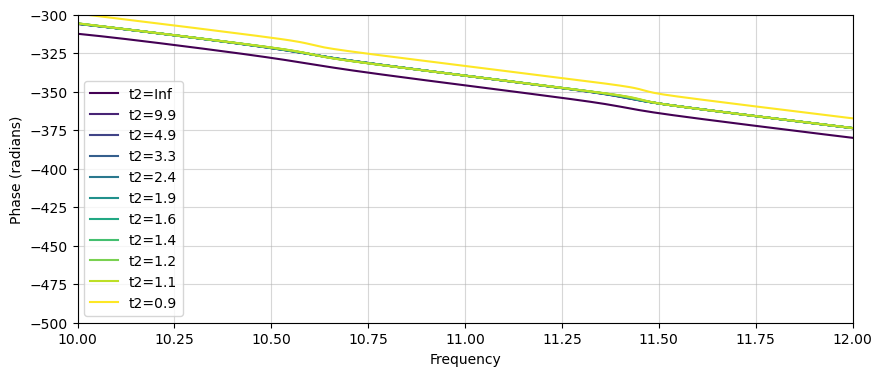

PyObject <matplotlib.legend.Legend object at 0x7fd3608578e0>

In [36]:
fig = plt.figure(figsize=(10,4))
cm = ColorMap("viridis")
ax = fig.add_subplot(1, 1, 1)
cs = cm.(LinRange(0,1,length(vtot)))
for (v1,v2,c,sim) in zip(vra,ver,cs,ens.simlist)
    ax.phase_spectrum(v1,Fs=fs,color=c,label=sim.id[1:6],pad_to=8length(v1))
end
ax.set_xticks(0:100,minor=true)
ax.grid(which="minor", alpha=0.2)
ax.grid(which="major", alpha=0.5)
ax.set_xlim((10,12))
ax.set_ylim((-500,-300))
ax.legend()

In [417]:
a(z::Complex) = angle(z) >= zero(real(z)) ? angle(z) : 2π + angle(z)

a (generic function with 1 method)

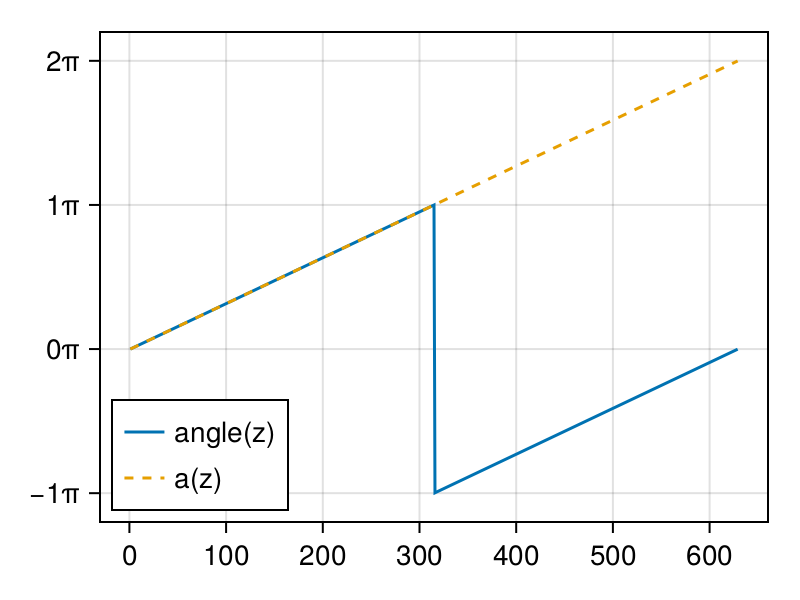

In [418]:
z=exp.(im .* collect(0:0.01:2π))
f = Figure(size=(400,300))
ax = Axis(f[1,1],yticks=MultiplesTicks(4,pi,"π"))
ylims!(ax,-1.2pi,2.2pi)
lines!(ax,angle.(z),label="angle(z)")
lines!(ax,a.(z),label="a(z)",linestyle=:dash)
axislegend(ax,position=:lb)
f

$$ I\propto \omega^2\lvert j_{inter} + j_{intra}\rvert 
= \omega^2\left[\lvert j_{inter}\rvert^2 + \lvert j_{inter}\rvert^2 
+ 2|j_{inter}||j_{intra}|\cos(\phi_{inter} - \phi_{intra})\right] $$

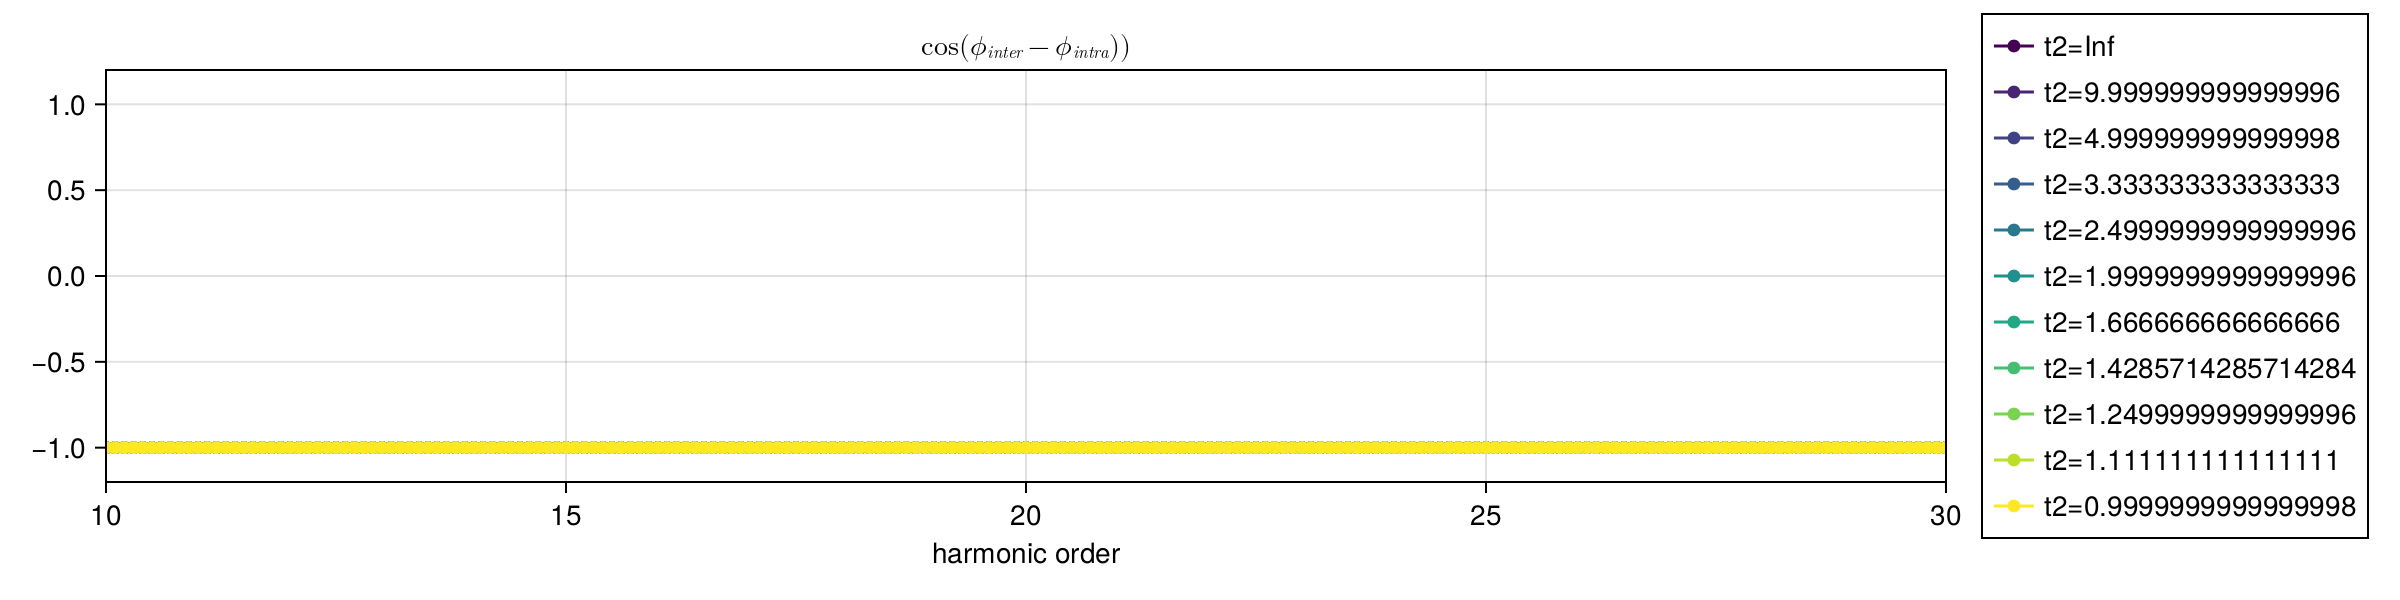

In [403]:
f   = Figure(size=(1200,300))
ax  = Axis(f[1,1],xlabel="harmonic order",title=L"\cos(\phi_{inter}-\phi_{intra}))")
for (i,v,v1,v2) in zip(1:length(vtot),ftvtot,ftver,ftvra)
    y = cos.(a.(v1) .- a.(v2)) 
    scatterlines!(ax,fre,y;color=i,colorrange=(1,length(vtot)),label=ens[i].id)
end
xlims!(ax,10,30)
ylims!(ax,-1.2,1.2)
f[1,2] = Legend(f,ax)
f

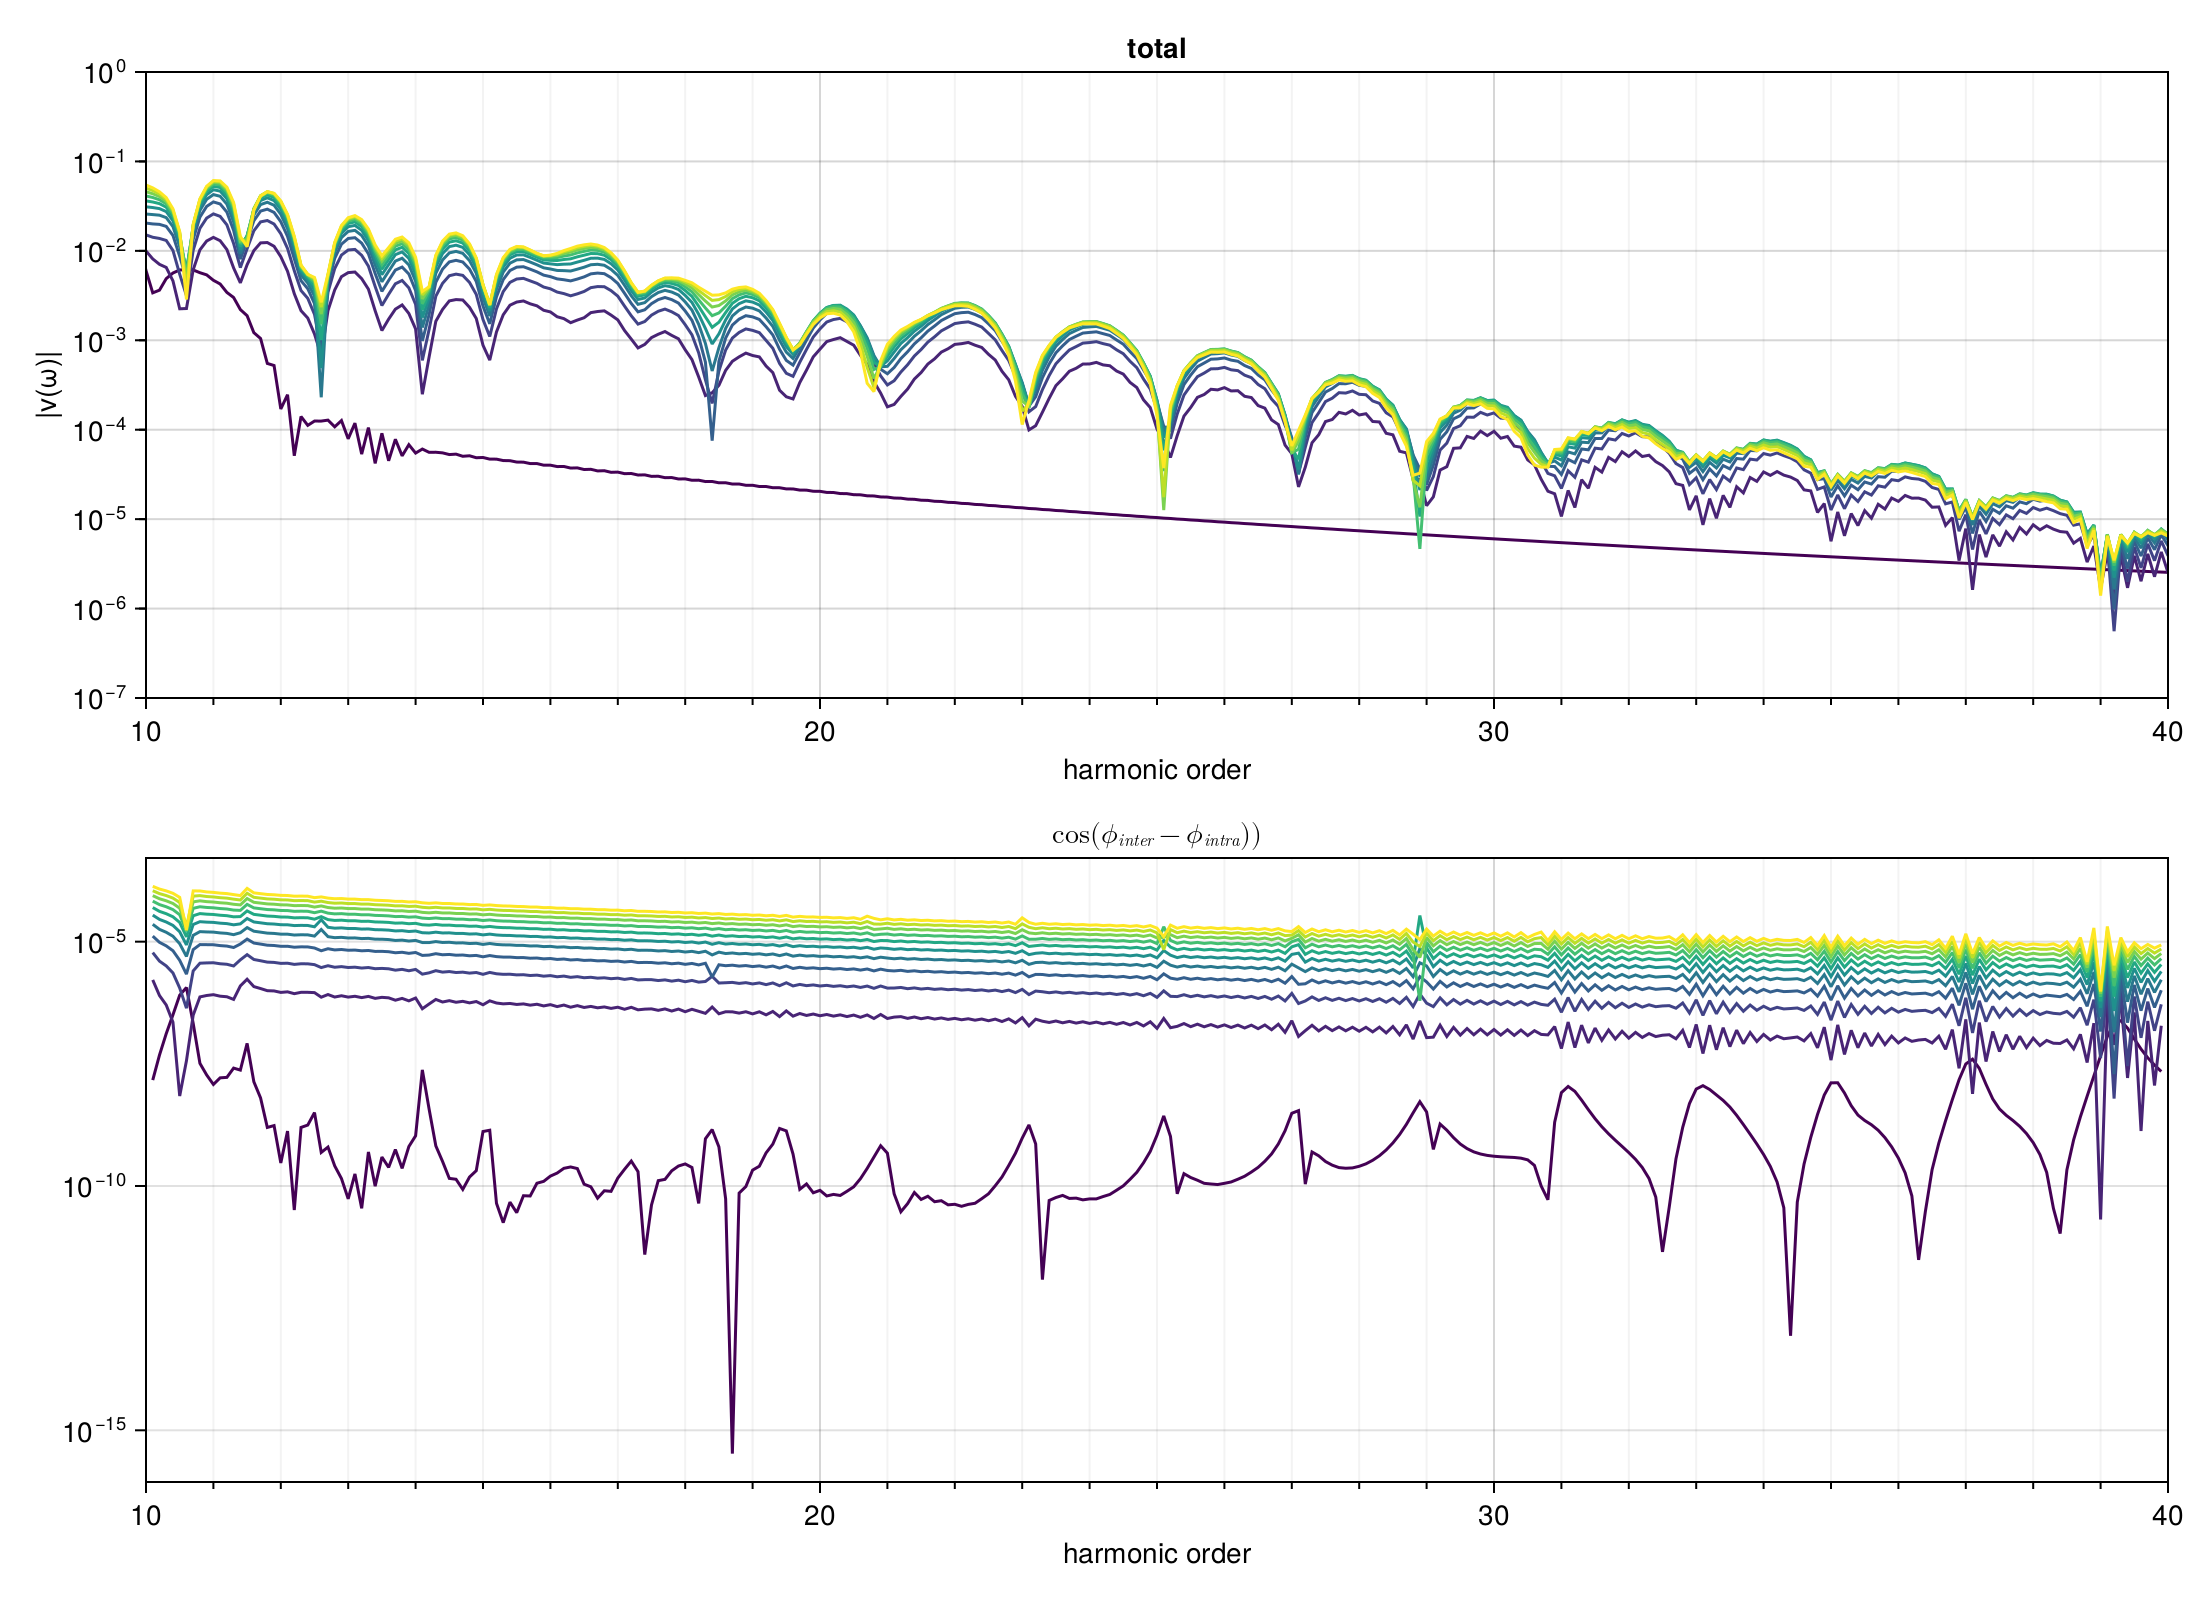

In [659]:
f   = Figure(size=(1100,800))
ax1 = Axis(f[1,1],yscale=log10,xlabel="harmonic order",ylabel="|v(ω)|",title="total",
    xminorticksvisible=true,
    xminorgridvisible=true,
    xminorticks=1:100,
    yminorticksvisible=true,
    yminorgridvisible=true,
    yminorticks=[10.0^j for j in -50:50])

ax2  = Axis(f[2,1],xlabel="harmonic order",title=L"\cos(\phi_{inter}-\phi_{intra}))",yscale=log10,
    xminorticksvisible=true,
    xminorgridvisible=true,
    xminorticks=1:100)
linkxaxes!(ax1, ax2)

xlims!(ax2,10,40)
for (i,d) in enumerate(ftvtot)
    inds = abs.(d) .> 1e-30 
    lines!(ax1,fre[inds],abs.(d[inds]);color=i,colorrange=(1,length(vtot)),label=ens[i].id)
end

# f[1,2] = Legend(f,ax)

for (i,v,v1,v2) in zip(1:length(vtot),ftvtot,ftver,ftvra)
    y = @. cos(a(v1) - a(v2)) + 1.0
    inds = 10 .< fre .< 40
    lines!(ax2,fre[inds],y[inds];color=i,colorrange=(1,length(vtot)),label=ens[i].id)
end

# ylims!(ax2,1,3)
ylims!(ax1,1e-7,1)
f

## Is it actually a power law?

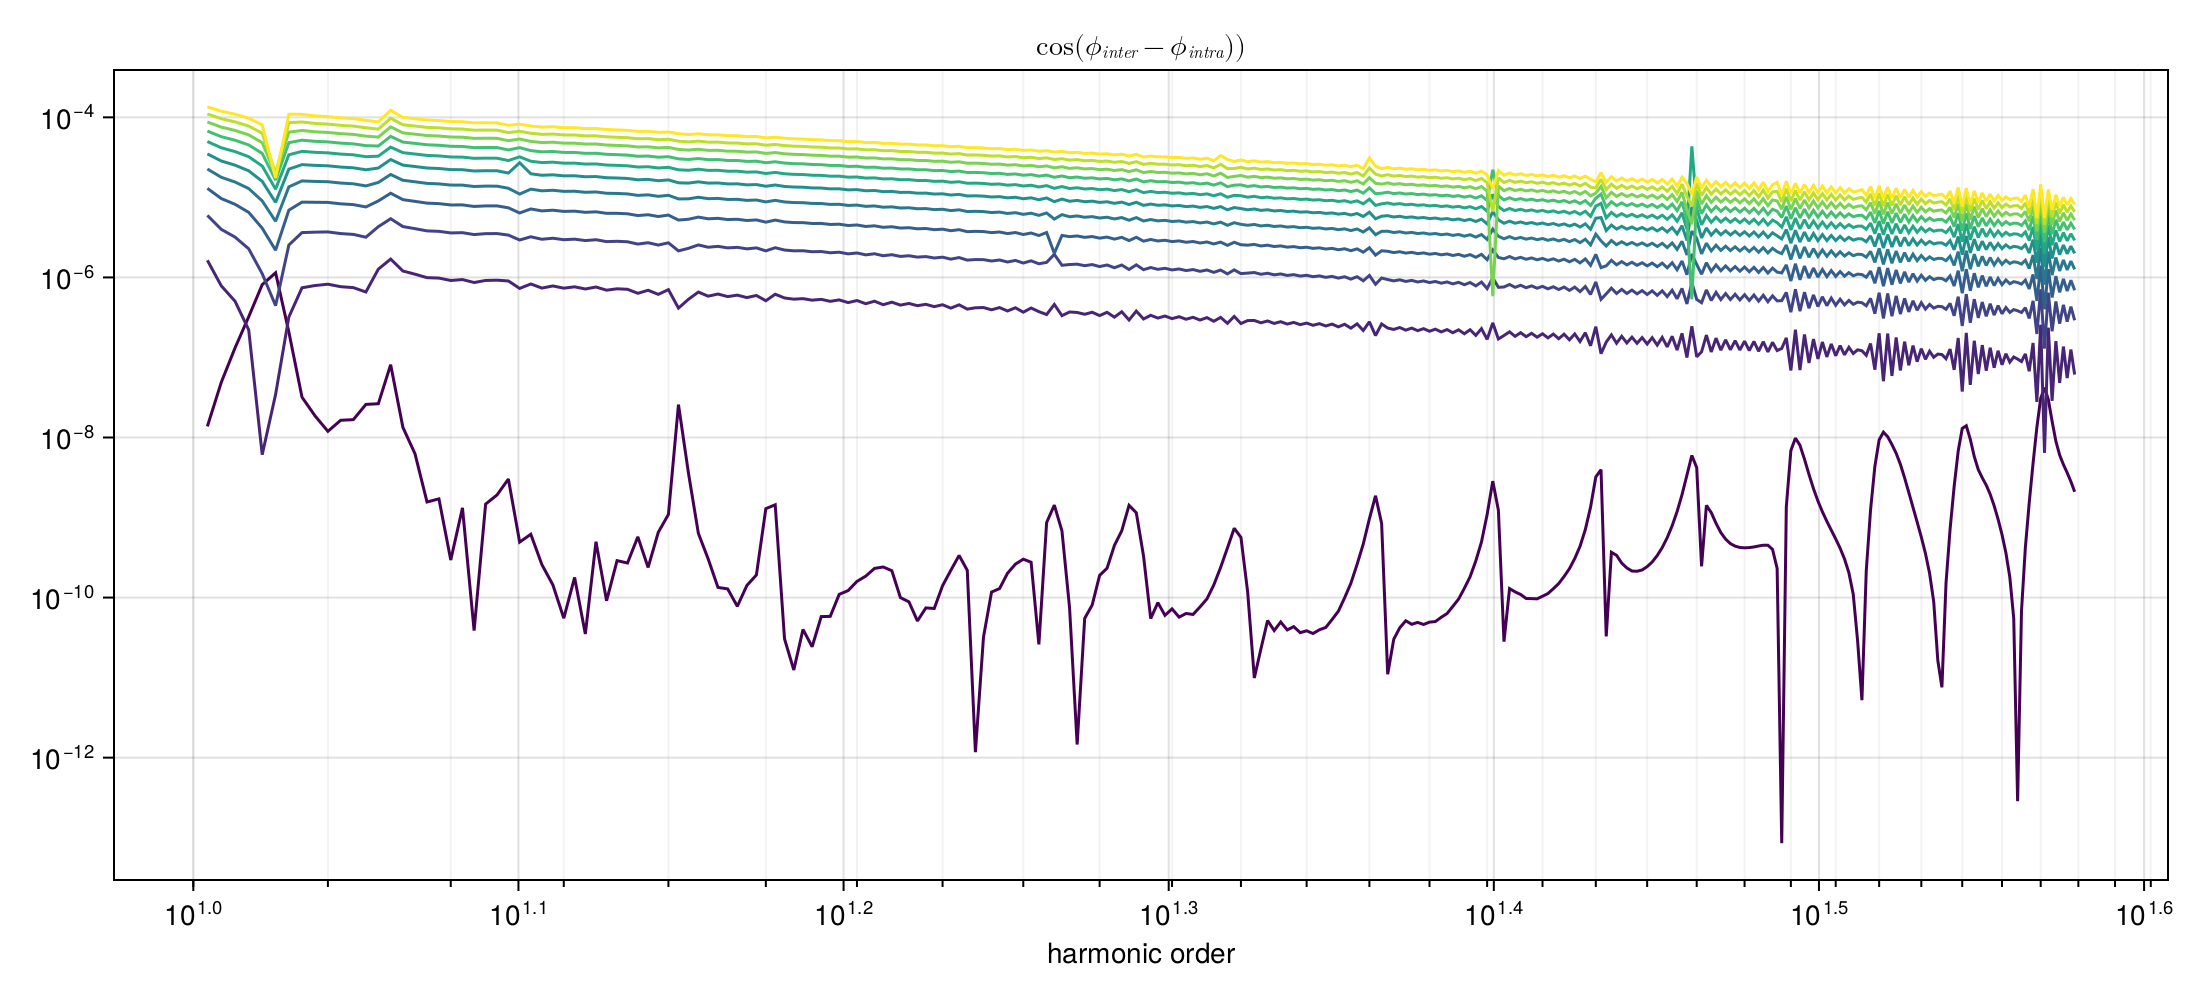

In [494]:
f   = Figure(size=(1100,500))
ax2  = Axis(f[1,1],xlabel="harmonic order",title=L"\cos(\phi_{inter}-\phi_{intra}))",yscale=log10,
    xscale=log10,
    xminorticksvisible=true,
    xminorgridvisible=true,
    xminorticks=1:100)

# xlims!(ax2,10,40)
for (i,v,v1,v2) in zip(1:length(vtot),ftvtot,ftver,ftvra)
    y = cos.(a.(v1) .- a.(v2)) .+ 1.0
    inds = 10 .< fre .< 38
    lines!(ax2,fre[inds],y[inds];color=i,colorrange=(1,length(vtot)),label=ens[i].id)
end

# ylims!(ax2,1,3)
f

### What would happen if cos(ϕ1 - ϕ2) = 0

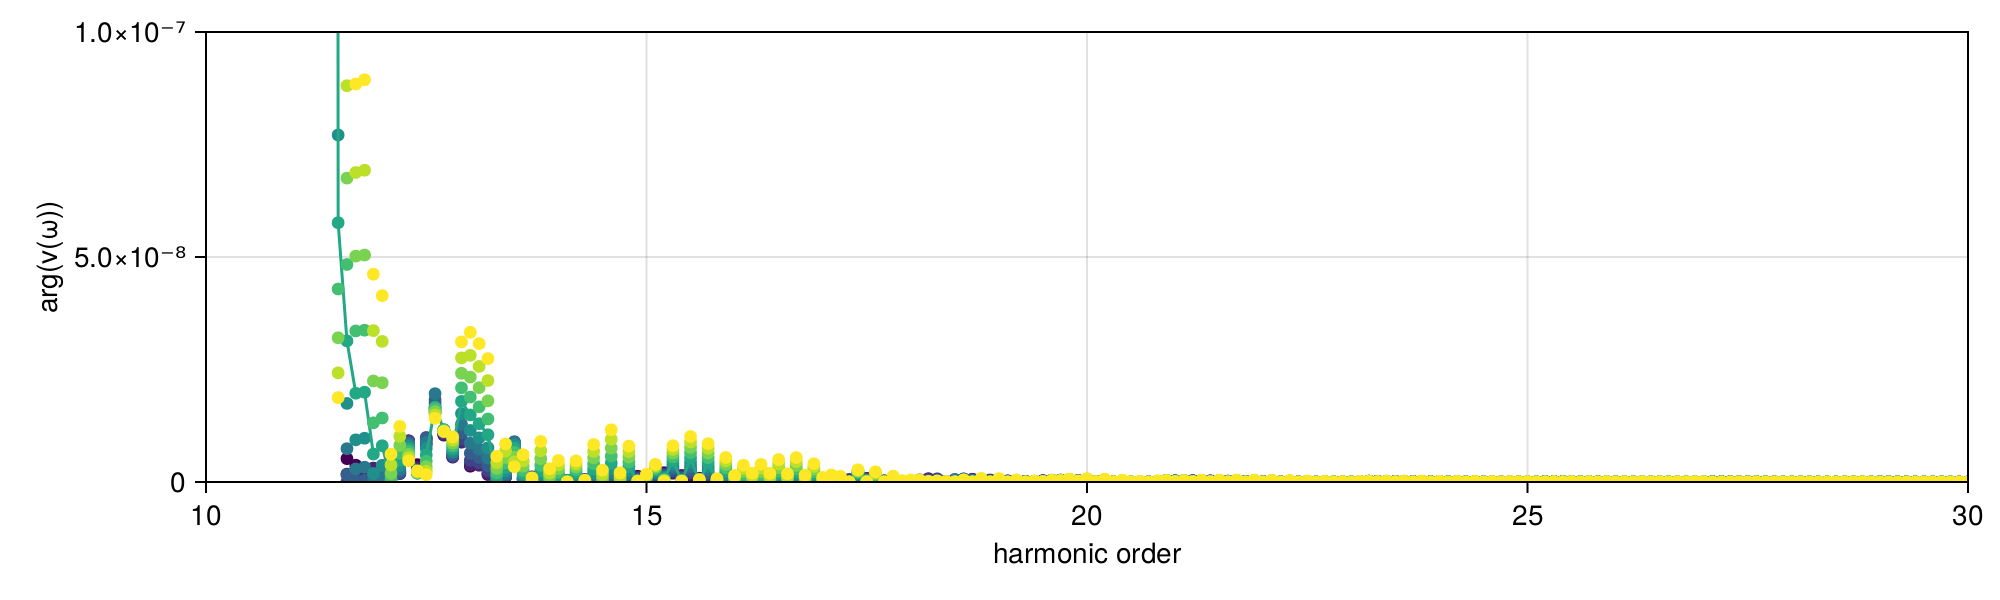

In [429]:
f   = Figure(size=(1000,300))
ax  = Axis(f[1,1],xlabel="harmonic order",ylabel="arg(v(ω))")
for (i,v,v1,v2) in zip(1:length(vtot),ftvtot,ftver,ftvra)
    y = @. abs2(v1) + abs2(v2) - 2abs(v1)*abs(v2)
    j = fre .> 10
    scatterlines!(ax,fre,y;color=i,colorrange=(1,length(vtot)))
end
xlims!(ax,10,30)
ylims!(ax,0.0,1e-7)
f